In [14]:
!ngrok authtoken 2d2sgQEsI7ROh0VTnP27yyaR40k_6dMCGbbrqLUXMxHYtrmfg

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/urllib/request.py", line 1348, in do_open
    h.request(req.get_method(), req.selector, req.data, headers,
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1282, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1328, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1277, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1037, in _send_output
    self.send(msg)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 975, in send

In [13]:
!pip install pyngrok

# Chat-GPT and MlFlow

In [ ]:
import mlflow
from google.colab.output import eval_js
from pyngrok import ngrok



# Запуск MLflow сервера
get_ipython().system_raw("mlflow ui --port 5000 &")

# Получение URL для доступа к MLflow UI через ngrok

ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)



ERROR:pyngrok.process.ngrok:t=2024-03-08T18:56:06+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [16]:
import mlflow
from mlflow.tracking import MlflowClient
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from pycaret.classification import *
from pycaret.datasets import get_data

# # Инициализация MLflow
# mlflow.set_tracking_uri("https://fc5b-34-148-7-28.ngrok-free.app")  # Укажите URI для вашего MLflow сервера

# Получение данных
data = get_data('amazon')

# Уменьшение объема данных
data_subset = data.iloc[:1000]

# Предварительная обработка текста
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = text.lower()  # Приведение к нижнему регистру
    text = text.translate(str.maketrans('', '', string.punctuation))  # Удаление пунктуации
    tokens = word_tokenize(text)  # Токенизация
    stop_words = set(stopwords.words('english'))  # Удаление стоп-слов
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()  # Лемматизация
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

data_subset['processed_reviews'] = data_subset['reviewText'].apply(preprocess_text)

# Преобразование TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_subset = tfidf_vectorizer.fit_transform(data_subset['processed_reviews'])
X_df_subset = pd.DataFrame(X_subset.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
data_processed_subset = pd.concat([data_subset, X_df_subset], axis=1)

# Настройка эксперимента с использованием PyCaret
exp = setup(data=data_processed_subset.iloc[:1000], target='Positive', session_id=123, fix_imbalance=True)

# Сравнение моделей
best_model = compare_models()

# Обучение модели
final_model = finalize_model(best_model)

# # Логирование метрик
# with mlflow.start_run():
#     mlflow.log_metric("accuracy", get_metrics()['Accuracy'])
# 
#     # Регистрация модели в MLflow
#     mlflow.pyfunc.log_model("model", python_model=final_model)
# 
#     # Отображение ссылки на MLflow UI
#     print("MLflow UI доступен по адресу:", mlflow.get_tracking_uri())



URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>

# TF-IDF and NLTK

In [ ]:
import mlflow
from mlflow.tracking import MlflowClient

In [9]:
# Базовые
import os
import time
import numpy as np

# EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предварительная обработка данных
import re
import spacy
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from concurrent.futures import ProcessPoolExecutor
from sklearn.model_selection import train_test_split


2024-03-10 20:49:49.718316: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Шаг 1: Загрузка данных в PyCaret
import pandas as pd
from pycaret.classification import *

# Загрузка данных
from pycaret.datasets import get_data
data = get_data('amazon')

# Шаг 2: Предварительная обработка текста
# Пример предварительной обработки текста (можно доработать по вашему усмотрению)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление пунктуации
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Токенизация
    tokens = word_tokenize(text)
    # Удаление стоп-слов
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Лемматизация
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Применение предобработки к столбцу с отзывами
data['processed_reviews'] = data['reviewText'].apply(preprocess_text)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['processed_reviews'])

# Преобразуем полученную матрицу в DataFrame и объединим с исходными данными
X_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
data_processed = pd.concat([data, X_df], axis=1)





URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>

,Description,Value
0,Session id,123
1,Target,Positive
2,Target type,Binary
3,Original data shape,"(20000, 3)"
4,Transformed data shape,"(27326, 3)"
5,Transformed train set shape,"(21326, 3)"
6,Transformed test set shape,"(6000, 3)"
7,Categorical features,2
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7618,0.5000,1.0000,0.7618,0.8648,0.0009,0.0096,0.9940
knn,K Neighbors Classifier,0.7618,0.5000,1.0000,0.7618,0.8648,0.0009,0.0096,0.8340
svm,SVM - Linear Kernel,0.7618,0.0000,1.0000,0.7618,0.8648,0.0009,0.0096,0.3280
ridge,Ridge Classifier,0.7618,0.0000,1.0000,0.7618,0.8648,0.0009,0.0096,0.3660
gbc,Gradient Boosting Classifier,0.7618,0.5000,1.0000,0.7618,0.8648,0.0009,0.0096,0.7040
et,Extra Trees Classifier,0.7618,0.5000,1.0000,0.7618,0.8648,0.0009,0.0096,0.6860
nb,Naive Bayes,0.7616,0.5000,1.0000,0.7616,0.8647,0.0000,0.0000,0.3020
dt,Decision Tree Classifier,0.7616,0.5000,1.0000,0.7616,0.8647,0.0000,0.0000,0.3430
rf,Random Forest Classifier,0.7616,0.5000,1.0000,0.7616,0.8647,0.0000,0.0000,0.6520
qda,Quadratic Discriminant Analysis,0.7616,0.5000,1.0000,0.7616,0.8647,0.0000,0.0000,0.5940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

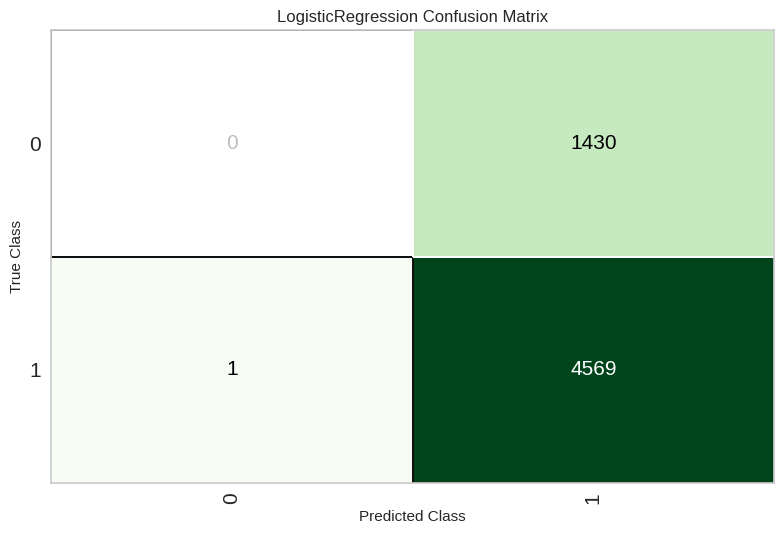

In [ ]:
# Шаг 3: Использование PyCaret для классификации
# Инициализация PyCaret и создание эксперимента
exp = setup(data=data_processed, target='Positive', session_id=123,fix_imbalance=True)

# Сравнение нескольких моделей
best_model = compare_models()

# Обучение модели
final_model = finalize_model(best_model)

# Визуализация результатов
plot_model(final_model, plot='confusion_matrix')

# Word2Vec

In [11]:
from pycaret.datasets import get_data
data = get_data('amazon')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>

In [ ]:
def print_short_summary(name, data):
    print(name)
    print('\n1. Data head:')
    print(data.head())
    print('\n2 Data shape: {}'.format(data.shape))
    print('\n3. Data info:')
    data.info()

In [ ]:
print_short_summary(data, data)

                                              reviewText  Positive
0      This is a one of the best apps acording to a b...         1
1      This is a pretty good version of the game for ...         1
2      this is a really cool game. there are a bunch ...         1
3      This is a silly game and can be frustrating, b...         1
4      This is a terrific game on any pad. Hrs of fun...         1
...                                                  ...       ...
19995  this app is fricken stupid.it froze on the kin...         0
19996  Please add me!!!!! I need neighbors! Ginger101...         1
19997  love it!  this game. is awesome. wish it had m...         1
19998  I love love love this app on my side of fashio...         1
19999  This game is a rip off. Here is a list of thin...         0

[20000 rows x 2 columns]

1. Data head:
                                          reviewText  Positive
0  This is a one of the best apps acording to a b...         1
1  This is a pretty good vers

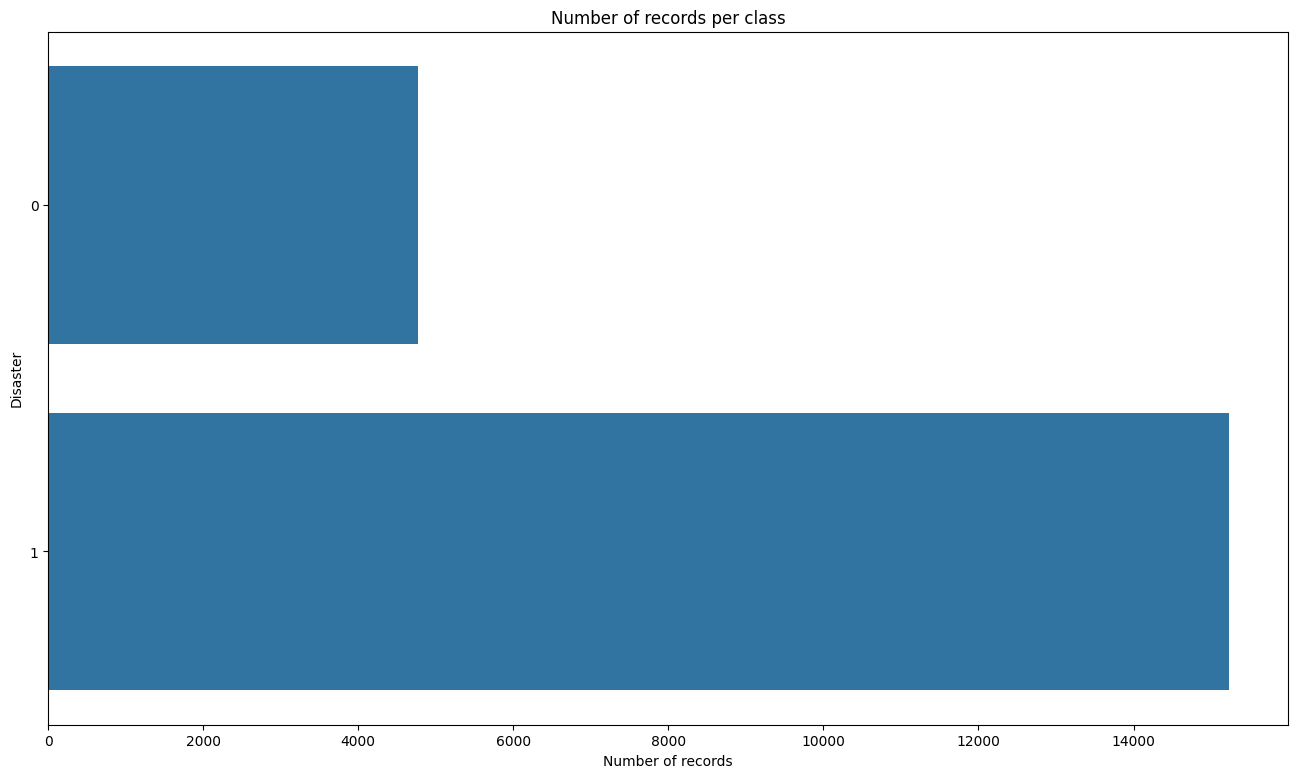

In [ ]:
# Построим горизонтальную гистограмму количества записей в классе
plt.figure(figsize=(16, 9))
tmp = data['Positive'].value_counts()
sns.barplot(y=tmp.index.values, x=tmp.values, orient='h')
plt.xlabel('Number of records')
plt.ylabel('Disaster')
plt.title('Number of records per class')
plt.show()

In [ ]:
def plot_word_dist_class(labels, top_n_words = 20):
    """
    Диаграммы с частотой слов для каждого класса.

    Args:
        labels: список классов
        top_n_words (opt): сколько самых популярных слов отображать на одной диаграмме.
    """
    n = len(labels)

    # sns
    default_palette = sns.color_palette("deep")

    # Инициализация подграфики с 1 строкой и n столбцами
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(16, 9))

    # Отобразите количество слов на автора в соответствующих строках.
    for i in range(n):
        col = i % n
        indexes = data['Positive'] == labels[i]
        w = data['reviewText'][indexes].str.split(expand=True).unstack().value_counts()
        l = w[:top_n_words]/np.sum(w)*100
        axes[col].bar(l.index, l.values, color=default_palette[i])
        axes[col].set_title(labels[i])
        axes[col].set_xlabel('Words')
        axes[col].set_ylabel('Percentage of total word count (%)')

    plt.tight_layout()
    plt.show()


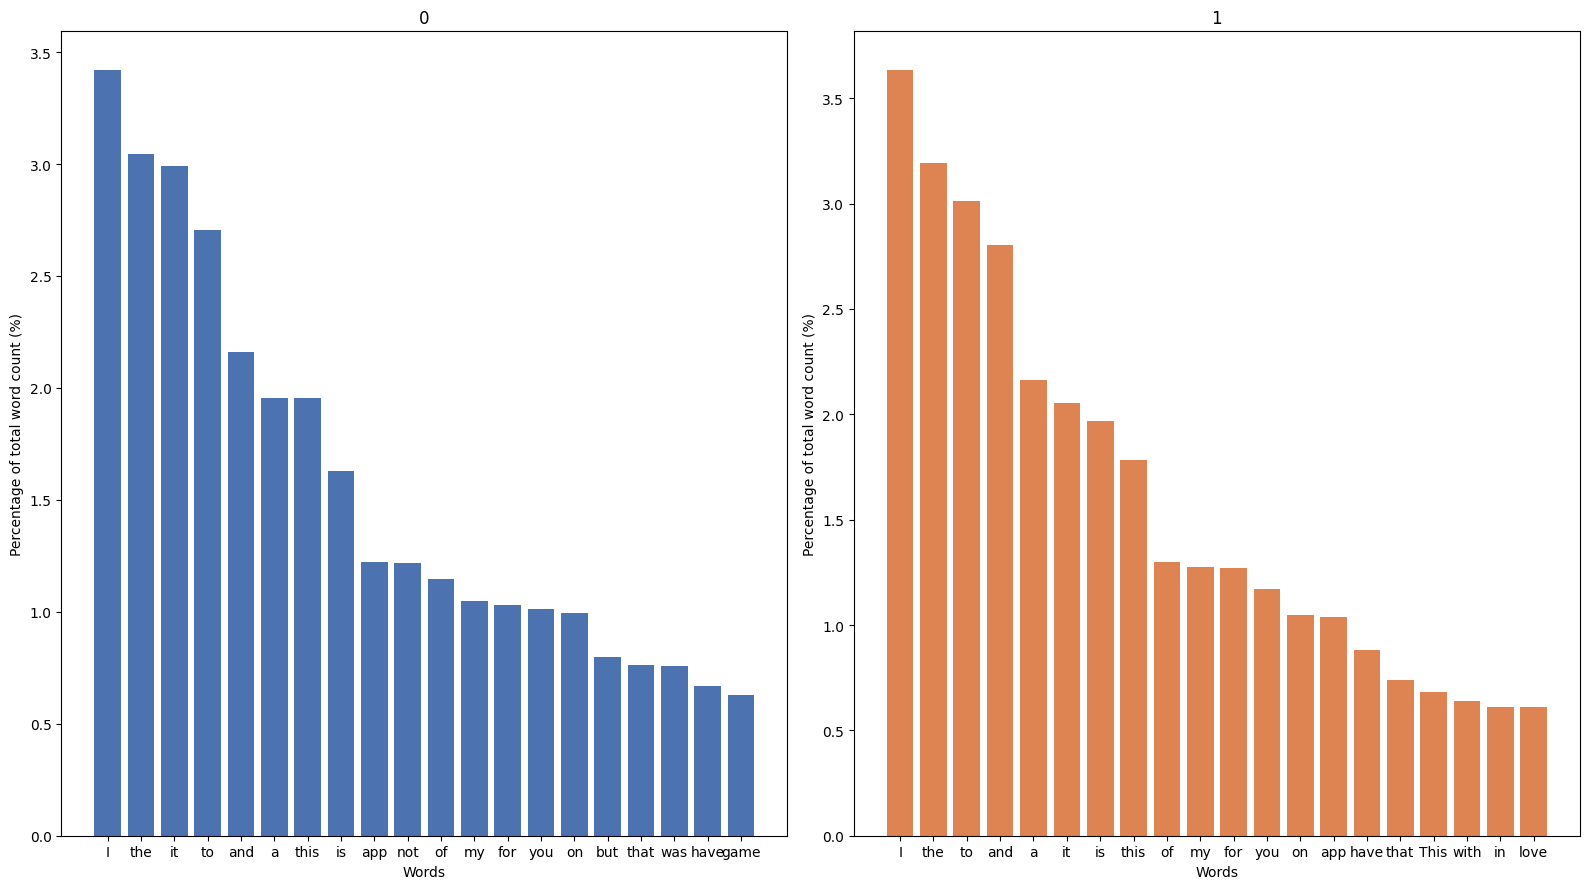

In [ ]:
# Частоты слов по классам
plot_word_dist_class([0,1])

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Загрузить английские леммы
spacy_process = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Скомпилировать шаблон регулярного выражения
pattern = re.compile(r'\b([a-zA-Z])\b')

# Установите английские стоп-слова, такие как
stop_words = set(stopwords.words('english'))

In [ ]:
def get_processed_text(text):
    """
    Возвращает лемматизированный текст без отдельных букв и частых стоп-слов.
    Все в нижнем регистре.

    Args:
        text (str): текст статьи
    Returns:
        string: текст чистых лемм
    """
    # Преобразовать в строчные одиночные буквы
    text = pattern.sub('', text.lower())

    # Получить лемма токены
    lemmas = spacy_process(text)
    lemmas = [token.lemma_ for token in lemmas if token.text not in stop_words]

    return ' '.join(lemmas)

def get_clean_text(texts):
    """
    Возврат списка очищенных текстов.
    Выполнение параллельное.

    Args:
        texts: пустой массив строковых элементов
    Returns:
        list: список очищенных лемматизированных токенов
    """
    # Настроить параллельную обработку задач Пул процессов
    with ProcessPoolExecutor() as executor:
        clean_texts = list(executor.map(get_processed_text, texts))

    return clean_texts

In [ ]:
# Получим очищенные данные тренировочного и тестового датасета
text_clean = get_clean_text(data['reviewText'].values)

In [ ]:
data_clean = pd.DataFrame({
    'reviewText': text_clean
    , 'Positive': data['Positive'].values
})

In [ ]:
data_clean

,reviewText,Positive
0,one good app acorde bunch people agree b...,1
1,pretty good version game free . lot differen...,1
2,really cool game . bunch level find golden...,1
3,"silly game frustrating , lot fun definitely ...",1
4,terrific game pad . hrs fun . grandkid lov...,1
...,...,...
19995,app fricken stupid.it freeze kindle will not a...,0
19996,please add ! ! ! ! ! need neighbor ! ginger1...,1
19997,love ! game . awesome . wish free stuff hous...,1
19998,love love love app side fashion story fight ...,1


In [ ]:
# Получим максимальное количество записей (не катастрофы)
max_count = sum(data_clean['Positive'] == 0)

# Получим минимальное количество записей (катастрофы)
min_count = sum(data_clean['Positive'] == 1)

# Повышение твитов до максимального количества некатастрофических
data_upsampled = []
data_downsampled = []
for i in range(2):
    class_data = data_clean[data_clean['Positive'] == i]
    class_data_up = class_data.sample(max_count
                                     , replace = True
                                     , random_state = 0)
    class_data_down = class_data.sample(min_count
                                     , replace = True
                                     , random_state = 0)
    data_upsampled.append(class_data_up)
    data_downsampled.append(class_data_down)

data_clean_upsamp = pd.concat(data_upsampled)
data_clean_downsamp = pd.concat(data_downsampled)

In [ ]:
# Проверить количество
print('Upsampled data:')
data_clean_upsamp['Positive'].value_counts()

Upsampled data:


0    4767
1    4767
Name: Positive, dtype: int64

In [ ]:
print('Downsampled data:')
data_clean_downsamp['Positive'].value_counts()

Downsampled data:


0    15233
1    15233
Name: Positive, dtype: int64

In [ ]:
# Создание и обучение токенов
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_clean['reviewText'].values)

# Преобразовать текст в список указателей слов в корпусе
data_list = [data_clean
             , data_clean_upsamp
             , data_clean_downsamp
            ]
sequences_list = []
for data in data_list:
    sequences_list.append(tokenizer.texts_to_sequences(data['reviewText'].values))

# Получить размер словаря для матрицы
VOCAB_SIZE = len(tokenizer.word_index) + 1

In [ ]:
# Получите максимально доступное количество ядер ЦП для обучения Word2Vec.
workers = os.cpu_count()

# Установить размерность
VECTOR_SIZE = 100

# Создать Word2Vec модель
w2v_model = Word2Vec(sentences = sequences_list[0]
         , vector_size = VECTOR_SIZE
         , window = 3
         , min_count = 1
         , workers = workers)

# Создать матрицу Word2Vec embeddings
EMBED_MATRIX = np.zeros((VOCAB_SIZE, VECTOR_SIZE))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        EMBED_MATRIX[i] = w2v_model.wv[word]

In [ ]:
from pycaret.classification import *
data_pycaret = data_clean.copy()
clf = setup(data=data_pycaret, target = 'Positive', session_id=123)

,Description,Value
0,Session id,123
1,Target,Positive
2,Target type,Binary
3,Original data shape,"(20000, 2)"
4,Transformed data shape,"(20000, 2)"
5,Transformed train set shape,"(14000, 2)"
6,Transformed test set shape,"(6000, 2)"
7,Categorical features,1
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7616,0.5000,1.0000,0.7616,0.8647,0.0000,0.0000,0.6350
knn,K Neighbors Classifier,0.7616,0.5000,1.0000,0.7616,0.8647,0.0000,0.0000,0.3090
nb,Naive Bayes,0.7616,0.5000,1.0000,0.7616,0.8647,0.0000,0.0000,0.0770
dt,Decision Tree Classifier,0.7616,0.5000,1.0000,0.7616,0.8647,0.0000,0.0000,0.0780
svm,SVM - Linear Kernel,0.7616,0.0000,1.0000,0.7616,0.8647,0.0000,0.0000,0.0740
ridge,Ridge Classifier,0.7616,0.0000,1.0000,0.7616,0.8647,0.0000,0.0000,0.0720
rf,Random Forest Classifier,0.7616,0.5000,1.0000,0.7616,0.8647,0.0000,0.0000,0.3960
ada,Ada Boost Classifier,0.7616,0.5000,1.0000,0.7616,0.8647,0.0000,0.0000,0.0780
gbc,Gradient Boosting Classifier,0.7616,0.5000,1.0000,0.7616,0.8647,0.0000,0.0000,0.2280
lda,Linear Discriminant Analysis,0.7616,0.5000,1.0000,0.7616,0.8647,0.0000,0.0000,0.0770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ValueError: Estimator chosen_model not available. Please see docstring for list of available estimators.

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

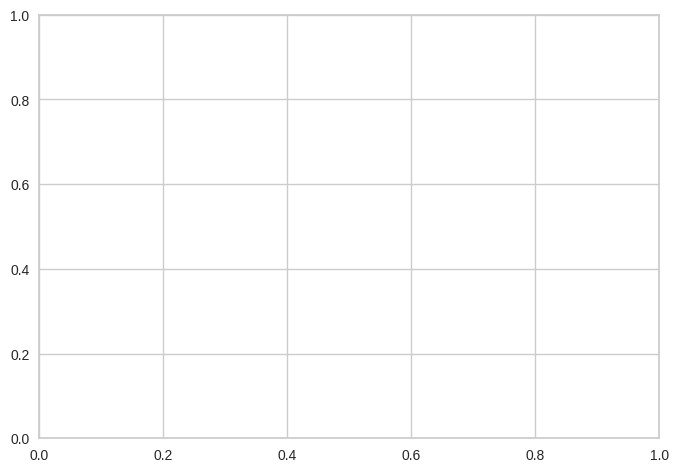

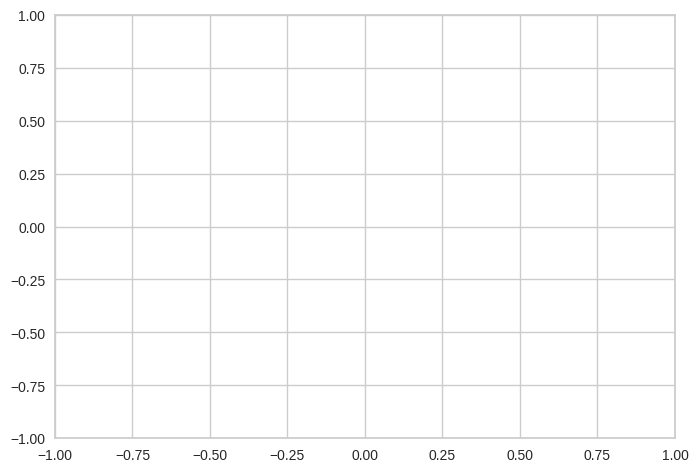

In [ ]:
evaluate_model(best)

In [ ]:
predictions = predict_model(best, data=data)
predictions.head()